# XENON1T - `npz`dataset

In [12]:
import hypothesis
import numpy as np
import matplotlib.pyplot as plt

from hypothesis.io.dataset import NPZDataset

In [9]:
dataset = NPZDataset("/home/joeri/XENON1T/simulations/", inputs="theta", outputs="data")

In [30]:
def plot_event(theta, event):
    # XENON1T definitions.
    PMT_distance_top = 7.95  # cm
    PMT_distance_bottom = 8.0  # cm
    PMTOuterRingRadius = 3.875  # cm
    # Fetch the PMT position.
    def get_pmt_positions_top(number):
        array = [i*6 for i in range(7)]
        array[0] = 1
        radius = [i*PMT_distance_top for i in range(7)]
        index1 = 0
        iTotal = array[0]
        while number > iTotal:
            index1 += 1
            iTotal += array[index1]
        index2 = number + array[index1] - iTotal
        x = radius[index1] * np.cos(index2*np.pi*2 / array[index1])
        y = radius[index1] * np.sin(index2*np.pi*2 / array[index1])
        return x, y
    # Rotate tuple over certain angle
    def rotate(pos, angle):
        return (pos[0]*np.cos(angle) -pos[1]*np.sin(angle), pos[0]*np.sin(angle) + pos[1]*np.cos(angle))
    positions_top = np.array([get_pmt_positions_top(i) for i in range(1, 128)])
    rotation_angle_top = np.pi/2 + (3/72)*2*np.pi  # Is this the correct rotation?
    positions_top = np.array([rotate(pos, rotation_angle_top) for pos in positions_top])
    xs_top = positions_top[:,0]
    ys_top = positions_top[:,1]
    pmt_locations = []
    for i in range(127):
        pmt_locations.append({'x': xs_top[127-1-i], 'y': ys_top[127-1-i]})
    top_channels = list(range(0, 127))
    bottom_channels = list(range(127, 247+1))
    plot_radius = 60
    plt.figure(figsize=(10,10))
    plt.xlim((-plot_radius, plot_radius))
    plt.ylim((-plot_radius, plot_radius))
    blues = plt.get_cmap("Blues")
    event /= np.max(event)
    for ch in top_channels:
        plt.gca().add_artist(plt.Circle((pmt_locations[ch]['x'],pmt_locations[ch]['y']), 
                             PMTOuterRingRadius,
                             color=blues(event[ch])))
        plt.annotate(str(ch), xy=(pmt_locations[ch]['x']-1.4,pmt_locations[ch]['y']-0.8))
    plt.xlabel('x [cm]')
    plt.ylabel('y [cm]')
    plt.axvline(theta[0], lw=2, color="C0", linestyle='--', alpha=.5)
    plt.axhline(theta[1], lw=2, color="C0", linestyle='--', alpha=.5)
    plt.title('XENON1T Top PMT array')
    plt.text(-55, 55, 'As seen from above', fontsize=15)
    plt.show()

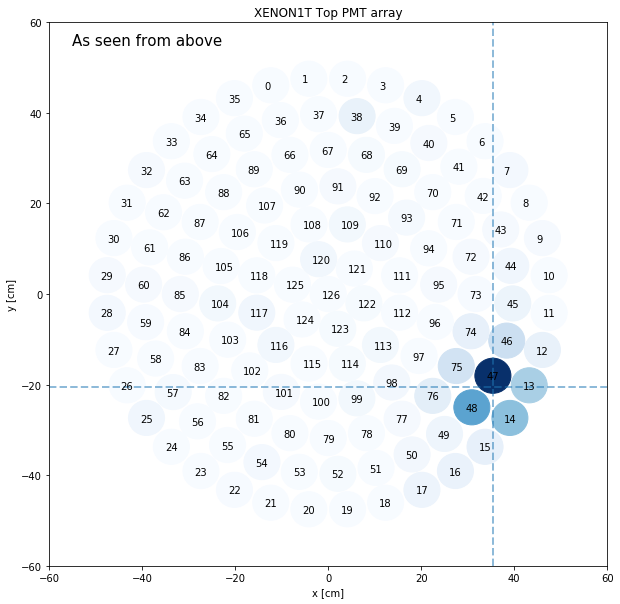

In [31]:
theta, event = dataset[0]
plot_event(theta, event)